In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from array import *
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
from IPython.display     import Image
import os
from spectrum_class import Spectrum
from molarity_class import Molarity
from diagnostic_class import Diagnostic
import spectrochempy as ch
import re
import scipy.optimize as opt
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.optimize import minimize_scalar as sc
from sklearn.metrics import r2_score

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.6.8© Copyright 2014-2024 - A.Travert & C.Fernandez @ LCS


In [2]:
def closest_index(array, number):
    # Calculate the absolute difference between each array element and the given number
    differences = [abs(x - number) for x in array]

    # Find the index of the smallest difference
    closest_index = differences.index(min(differences))

    return closest_index

def max_index_in_portion(array, start, end):
    # Ensure the portion is within the array bounds
    if start < 0 or end > len(array) or start > end:
        return "Invalid portion of array"

    # Get the portion of the array
    portion = array[start:end]

    # Find the index of the max value in the portion
    max_index_portion = np.argmax(portion)

    # Convert the index in the portion to the index in the original array
    max_index_array = start + max_index_portion

    return max_index_array
def close_indices_in_portion(array1, array2, start, end, tolerance):
    # Ensure the portion is within the array bounds
    if start < 0 or end > len(array1) or end > len(array2) or start > end:
        return "Invalid portion of array"

    # Get the portions of the arrays
    portion1 = array1[start:end]
    portion2 = array2[start:end]

    # Find the indices where the two portions are close to each other
    close_indices_portion = np.where(np.isclose(portion1, portion2, atol=tolerance))[0]

    # Convert the indices in the portion to the indices in the original arrays
    close_indices_array = start + close_indices_portion

    return close_indices_array

In [3]:
# ----- Obtain the path to the spa folder
path = os.path.dirname(os.getcwd())

path_spa = path + '\\spa data\\'

In [4]:
# Initialize an empty dictionary to store data
data_dict = {}
keys = np.array([0,.4,.7,1,1.3,1.6])

i = 0
# Loop through each inner folder
for molarity_folder in os.listdir(path_spa):
    # Construct the full path to the inner folder
    molarity_folder = os.path.join(path_spa, molarity_folder)
    
    # Check if the path is a directory
    if os.path.isdir(molarity_folder):
        # Initialize an empty list to store data from files in this inner folder
        data = ch.read_omnic(molarity_folder)
        
        data_dict[keys[i]] = data
        i += 1


In [5]:
# create Molarity objects from the dictionary
keys = list(data_dict.keys())
Molarities = []
for i in range(len(data_dict)):
    # select an NDDataset object, create a Molarity object
    a = Molarity(obj = data_dict[keys[i]],M = keys[i],smooth = 2.0)

    # add to the list of Molarity arrays
    Molarities.append(a)


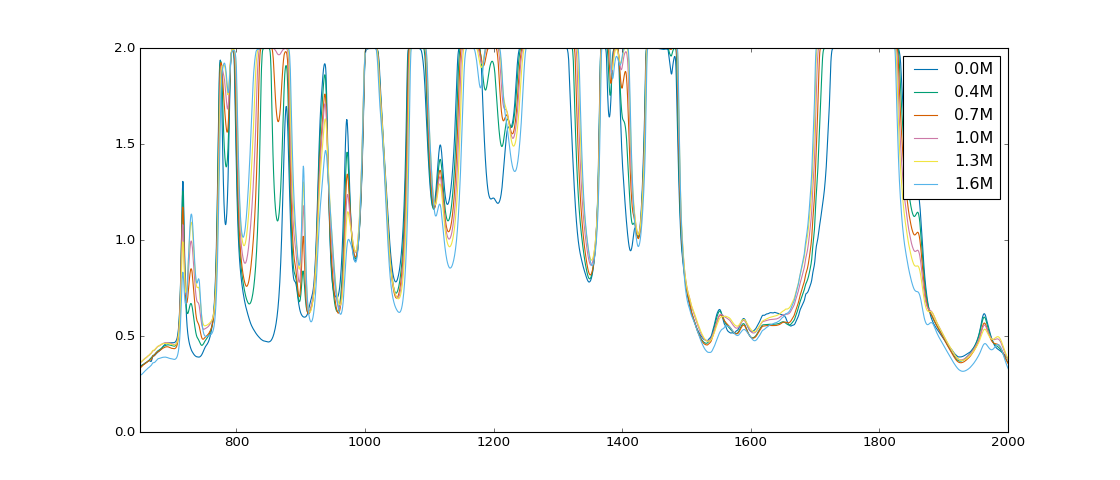

In [6]:
# ----- Exporting the data to a .csv file
# getting the x data
wavenumbers = Molarities[0].get_x()

aiml = np.array([])
aiml = np.append(aiml,wavenumbers)

titles = np.array(['Wavenumber (cm^-1)'])

# getting the y data
for i in range(len(Molarities)):
    # load the data
    working_object = Molarities[i]
    working_ys = working_object.get_y()
    M = working_object.get_M()

    aiml = np.vstack((aiml,working_ys))
    titles = np.append(titles,str(M) + 'M')


aiml = aiml.T

data = pd.DataFrame(aiml,columns = titles)
# data.set_index('Wavenumber (cm^-1)', inplace=True)

plt.figure(figsize = (14,6))
for i in range(len(titles) - 1):
    plt.plot(data['Wavenumber (cm^-1)'],data[titles[i + 1]],label = titles[i+1])

plt.xlim(650,2000)
plt.legend()
plt.show()
#print(data[titles[1]])

6950000


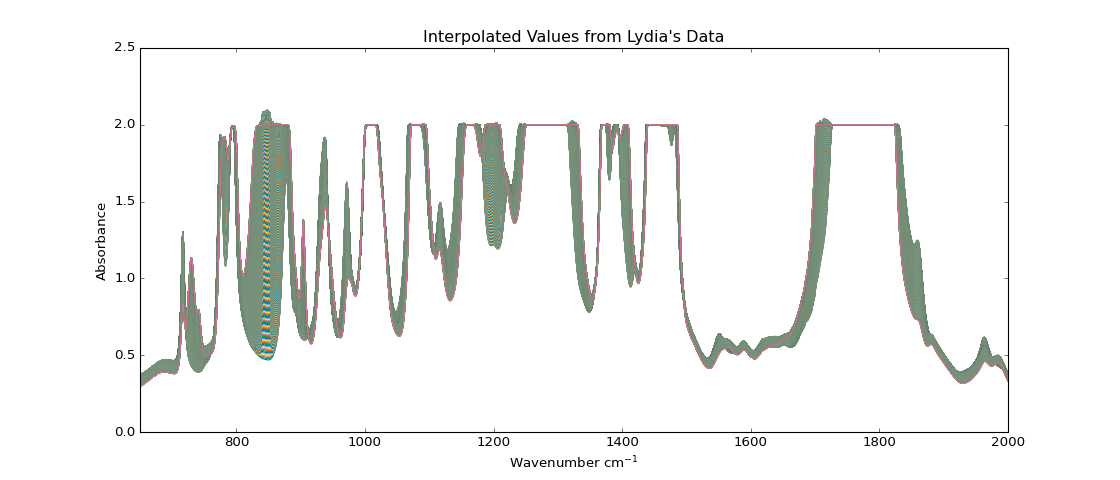

In [15]:
absorbances = np.array([data[titles[1]],data[titles[2]],data[titles[3]],data[titles[4]],data[titles[5]],data[titles[6]]])
wavenumbers = data['Wavenumber (cm^-1)']
concentrations = np.array([0.0,0.4,0.7,1.0,1.3,1.6])

# Create an array for the new concentrations from 0M to 1.6M
new_concentrations = np.linspace(0, 1.6, 1000)

# Create a 2D grid for the new concentrations and wavenumbers
new_concentrations_grid, wavenumbers_grid = np.meshgrid(new_concentrations, wavenumbers)

# Flatten the arrays for the griddata function
points = np.array([concentrations.repeat(wavenumbers.size), np.tile(wavenumbers, concentrations.size)]).T
values = absorbances.flatten()

# Interpolate the absorbance for each wavenumber and concentration
new_absorbances = griddata(points, values, (new_concentrations_grid, wavenumbers_grid), method='cubic')
#print(new_absorbances[1,:])
plt.figure(figsize=(14,6))
for i in range(len(new_concentrations)):
    plt.plot(wavenumbers,new_absorbances[:,i])
    plt.xlim(650,2000)
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
plt.title("Interpolated Values from Lydia's Data")


In [39]:
#Saving the average absorbances into individual arrays to match how the diagnostics were written previously
avg0 = absorbances[0]
avg4 = absorbances[1]
avg7 = absorbances[2]
avg1 = absorbances[3]
avg13 = absorbances[4]
avg16 = absorbances[5]
#print(np.shape(new_absorbances))
new_abs1 = new_absorbances[::2]
new_abs2 = new_absorbances[1::2]
new_conc1 = new_concentrations[::2]
new_conc2 = new_concentrations[1::2]
wn1 = wavenumbers[::2]
wn2 = wavenumbers[1::2]
#print(np.shape(new_abs1),np.shape(new_abs2),np.shape(new_conc1))
print(new_abs1)
print(new_abs2)

[[  0.2358   0.2358 ...   0.2152   0.2151]
 [  0.2357   0.2357 ...   0.2149   0.2148]
 ...
 [  0.3449   0.3449 ...   0.2979   0.2975]
 [  0.3414   0.3414 ...   0.2935   0.2931]]
[[  0.2358   0.2358 ...   0.2152   0.2151]
 [  0.2355   0.2355 ...   0.2147   0.2146]
 ...
 [  0.3438   0.3438 ...   0.2967   0.2962]
 [  0.3414   0.3414 ...   0.2936   0.2931]]


Method 1: 716cm −1
 /728cm −1
  peak ratio
EC ring bending

R2 of the Diagnostic curve fit is 0.999043251676432


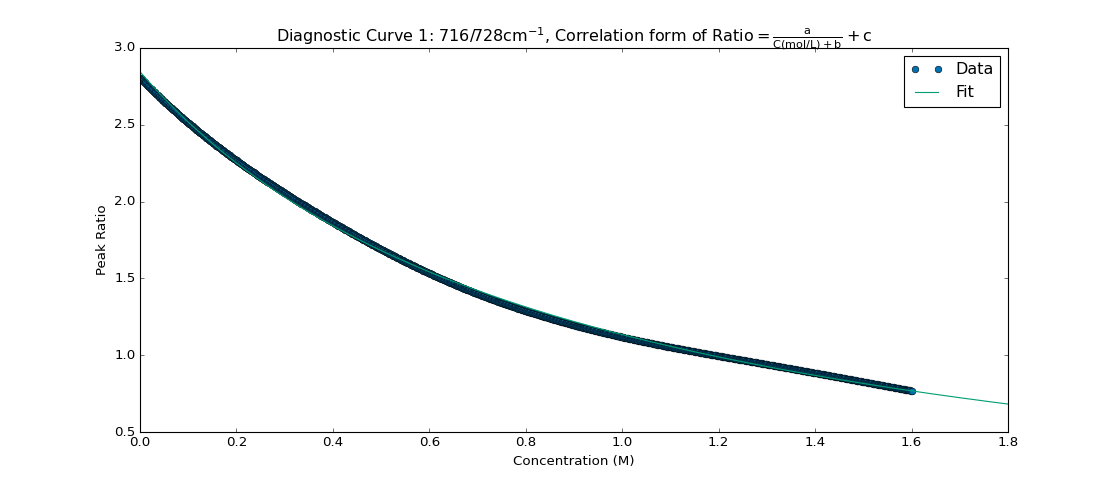

In [34]:
x1 = closest_index(wn1,716.5)
x2 = closest_index(wn1,728)
concar = np.array([0,.4,.7,1,1.3,1.6])
#print(x1,x2)
def func(x,a,b,c):
    return (a / (b + x)) + c

Cor1_0M = (avg0[x1]/avg0[x2])
Cor1_4M = avg4[x1]/avg4[x2]
Cor1_7M = avg7[x1]/avg7[x2]
Cor1_1M = avg1[x1]/avg1[x2]
Cor1_13M = avg13[x1]/avg13[x2]
Cor1_16M = avg16[x1]/avg16[x2]
Cor1ar = np.zeros(1000)
for i in range(1000):
    Cor1ar[i] = new_abs1[x1,i]/new_abs1[x2,i]
    

corfit1,extras = curve_fit(func,new_concentrations,Cor1ar)

xx = np.linspace(0,1.8,1000)
yy1 = func(xx,corfit1[0],corfit1[1],corfit1[2])
plt.figure(figsize=(14,6))
plt.plot(new_concentrations,Cor1ar,'o',label="Data")
plt.plot(xx,yy1,label="Fit")
plt.xlabel("Concentration (M)")
plt.ylabel("Peak Ratio")
plt.title(r"Diagnostic Curve 1: 716/728cm$^{-1}$, Correlation form of $Ratio = \frac{a}{C (mol/L) + b} + c$")
plt.legend()

#R2 Score of Fit
f1 = func(new_concentrations,corfit1[0],corfit1[1],corfit1[2])
r21 = r2_score(Cor1ar,f1)
print("R2 of the Diagnostic curve fit is",r21)

R2 of the Diagnostic curve fit is 0.9794434418486682


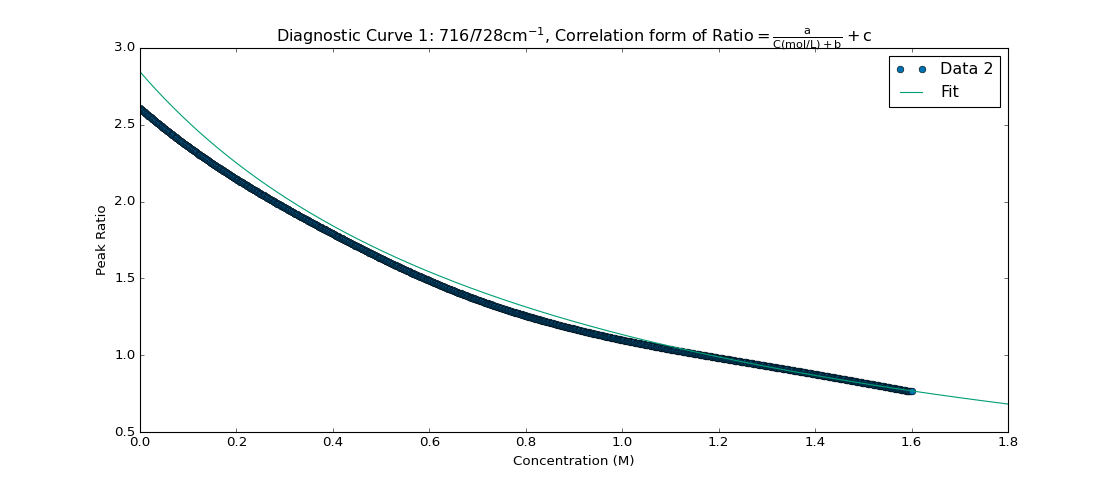

In [40]:
x12 = closest_index(wn2,716.5)
x22 = closest_index(wn2,728)
Cor1ar2 = np.zeros(1000)
for i in range(1000):
    Cor1ar2[i] = new_abs2[x1,i]/new_abs2[x2,i]

plt.figure(figsize=(14,6))
plt.plot(new_concentrations,Cor1ar2,'o',label="Data 2")
plt.plot(xx,yy1,label="Fit")
plt.xlabel("Concentration (M)")
plt.ylabel("Peak Ratio")
plt.title(r"Diagnostic Curve 1: 716/728cm$^{-1}$, Correlation form of $Ratio = \frac{a}{C (mol/L) + b} + c$")
plt.legend()

#R2 Score of Fit
f1 = func(new_concentrations,corfit1[0],corfit1[1],corfit1[2])
r212 = r2_score(Cor1ar2,f1)
print("R2 of the Diagnostic curve fit is",r212)